In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#1. Analyze: Data1 using ridge regression.

(a) Report the pre-processing and validation techniques used.

(b) Plot different λ values (regularization parameters values) against training error and validation error, in a single figure and mark the optimal one. Plot J(w).

(c) Report the parameters of the model.

(d) Assess the performance of the model.

(e) Plot the hyperplane that generates the data.

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data1.csv",header=None)
df1.head()

,0,1,2
0,1.10500,-2.60510,34.2610
1,0.30463,1.55360,1.1477
2,2.67450,1.17810,15.6260
3,-3.54260,0.79471,-12.7760
4,-0.22632,4.44160,-21.7230


In [6]:
df1.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,-0.124053,-0.122621,8.238073
std,2.833827,2.847886,23.068654
min,-4.941700,-4.998100,-51.478000
25%,-2.582175,-2.380425,-9.113900
50%,0.141255,-0.234475,9.332900
75%,2.139825,1.927975,23.386500
max,4.917200,4.967100,62.702000


In [7]:
df1.corr()

,0,1,2
0,1.000000,0.146643,0.484745
1,0.146643,1.000000,-0.777274
2,0.484745,-0.777274,1.000000


In [8]:
df1.insert(0,"x0",1)
df1.columns = [0,1,2,3]
df1.head()

,0,1,2,3
0,1,1.10500,-2.60510,34.2610
1,1,0.30463,1.55360,1.1477
2,1,2.67450,1.17810,15.6260
3,1,-3.54260,0.79471,-12.7760
4,1,-0.22632,4.44160,-21.7230


In [9]:
from sklearn.model_selection import train_test_split 
Dtrain,Dtest = train_test_split(df1,test_size=0.25,random_state=0)
Dtrain.head()

,0,1,2,3
71,1,0.51357,-2.4009,32.374
124,1,-4.25530,1.8827,-28.955
184,1,1.19990,4.0235,-19.164
97,1,-3.01370,4.7480,-35.305
149,1,4.56090,-4.4454,59.422


In [10]:
l = np.logspace(-2,0,20)
training_error = []
validation_error = []
I = np.zeros((Dtrain.shape[1]-1,Dtrain.shape[1]-1))
I[1:,1:] = np.eye(Dtrain.shape[1]-2)
for k in l:
  te = np.zeros(30)
  ve = np.zeros(30)
  for j in range(30):
    train,valid = train_test_split(Dtrain,test_size=0.25)
    # Training
    X = np.array(train[[0,1,2]])
    y = np.array(train[3])
    w = np.linalg.inv(X.T@X+k*I)@X.T@y 
    # Training error
    te[j] = ((X@w-y)**2).mean()
    # Validation error
    X = np.array(valid[[0,1,2]])
    y = np.array(valid[3])
    ve[j]= ((X@w-y)**2).mean()
  training_error.append(te.mean())
  validation_error.append(ve.mean())

print(l)
print(training_error)
print(validation_error)

[0.01       0.01274275 0.01623777 0.02069138 0.02636651 0.03359818
 0.04281332 0.05455595 0.06951928 0.08858668 0.11288379 0.14384499
 0.18329807 0.23357215 0.29763514 0.37926902 0.48329302 0.61584821
 0.78475997 1.        ]
[15.49762585467594, 15.703363534582985, 15.760101806474099, 15.642292480806184, 15.702452888236644, 15.8027010677441, 15.60627234293148, 15.730557461537199, 15.83111951018093, 15.714209197974526, 15.622878398719228, 15.679742139443928, 15.467944544403938, 15.64222958930942, 15.688325099851218, 15.895314959372861, 15.801632741551277, 15.602586027429783, 15.705195234922277, 15.693262767782572]
[17.24222152570778, 16.42407146106831, 16.332357431148928, 16.692892733463964, 16.57193485426462, 16.141634362184497, 16.832739876014667, 16.495971885266965, 16.102880708024877, 16.460638891049694, 16.80254427396291, 16.60102253924828, 17.318954831559743, 16.772342276977778, 16.627043756786943, 15.99429966171841, 16.17236274618214, 16.811385128252898, 16.54169693147305, 16.5182

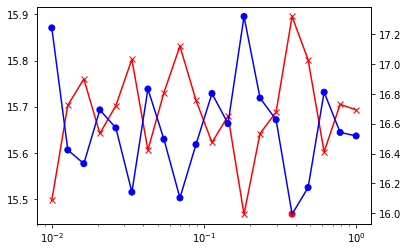

In [11]:
ax1= plt.figure().gca()
vmin = np.min(validation_error)
mask = validation_error == vmin
color = np.where(mask, 'red', 'blue')
ax1.plot(l,training_error,"rx-")
ax1.set_xscale("log")
ax2 = ax1.twinx()
ax2.plot(l,validation_error,"b-")
ax2.scatter(l,validation_error,color=color)
ax2.set_xscale("log")
plt.show()

In [12]:
# Training
l = l[np.argmin(validation_error)]
X = np.array(Dtrain[[0,1,2]])
y = np.array(Dtrain[3])
I = np.zeros((Dtrain.shape[1]-1,Dtrain.shape[1]-1))
I[1:,1:] = np.eye(Dtrain.shape[1]-2)
w = np.linalg.inv(X.T@X+l*I)@X.T@y
# Training RMSE
TRMSE = np.sqrt(((X@w-y)**2).mean())
# Testing RMSE
X = np.array(Dtest[[0,1,2]])
y = np.array(Dtest[3])
TERMSE = np.sqrt(((X@w-y)**2).mean())
print(TRMSE,TERMSE)

3.9756713503398635 3.914010472446084


In [13]:
#parameters
print(w)

[ 8.10640074  4.918286   -6.95865927]


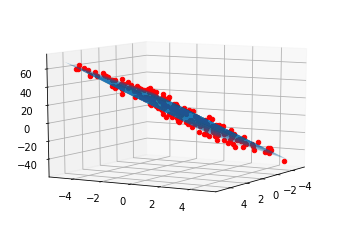

In [14]:
x1 = np.linspace(-5,5,50)
x2 = np.linspace(-5,5,50)
np.random.shuffle(x2)
X1,X2 = np.meshgrid(x1,x2)
f = (w[0]+w[1]*X1+w[2]*X2)
ax = plt.figure().gca(projection="3d")
ax.scatter3D(df1[1],df1[2],df1[3],depthshade=False,c="r")
ax.plot_surface(X1,X2,f,alpha=0.1,shade=False)
ax.view_init(10,30)
plt.show()

# 2. Analyze Data 2 using regularized logistic regression

(a) Report the hyperparameters.

(b) Plot J(w).

(c) Assess the performance of the model.

(d) Plot the hyperplane that separates the data.

In [15]:
df2 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data2.csv",header=None)
df2.head()

,0,1,2,3
0,-49.966,-11.5760,-13.5500,1
1,-49.676,37.6910,-6.3181,-1
2,-49.469,-23.7300,-41.7090,-1
3,-49.395,-3.4131,6.1457,1
4,-49.241,-9.9994,24.9850,-1


In [16]:
df2[3] = 0.5*(df2[3]+1)
df2.head()

,0,1,2,3
0,-49.966,-11.5760,-13.5500,1.0
1,-49.676,37.6910,-6.3181,0.0
2,-49.469,-23.7300,-41.7090,0.0
3,-49.395,-3.4131,6.1457,1.0
4,-49.241,-9.9994,24.9850,0.0


In [17]:
df2.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.00000
mean,-2.242387,-1.744356,0.468136,0.50500
std,30.165201,28.860764,29.311394,0.50123
min,-49.966000,-49.973000,-49.752000,0.00000
25%,-29.219000,-25.329500,-24.114750,0.00000
50%,-1.012635,-5.648150,-0.068395,1.00000
75%,27.042500,23.452750,23.447250,1.00000
max,49.558000,49.913000,49.988000,1.00000


In [18]:
df2.corr()

,0,1,2,3
0,1.000000,0.048255,0.012703,0.129103
1,0.048255,1.000000,-0.002130,-0.602010
2,0.012703,-0.002130,1.000000,0.076737
3,0.129103,-0.602010,0.076737,1.000000


In [19]:
df2.insert(0,"x0",1)
df2.columns = range(0,5)
df2.head()

,0,1,2,3,4
0,1,-49.966,-11.5760,-13.5500,1.0
1,1,-49.676,37.6910,-6.3181,0.0
2,1,-49.469,-23.7300,-41.7090,0.0
3,1,-49.395,-3.4131,6.1457,1.0
4,1,-49.241,-9.9994,24.9850,0.0


In [20]:
from sklearn.model_selection import train_test_split 
Dtrain,Dtest = train_test_split(df2,test_size=0.25,random_state=0)
Dtest.head()

,0,1,2,3,4
18,1,-44.0080,-22.834,0.19704,0.0
170,1,34.2660,19.222,-8.34120,0.0
107,1,6.0787,-47.923,5.42770,0.0
98,1,-3.2340,-15.133,-24.84000,0.0
177,1,37.1710,26.116,-24.98800,0.0


In [21]:
Dtrain.describe()

,0,1,2,3,4
count,150.0,150.000000,150.000000,150.000000,150.000000
mean,1.0,-2.340402,-0.932173,1.314135,0.506667
std,0.0,30.036900,27.980254,28.910231,0.501630
min,1.0,-49.966000,-49.973000,-49.752000,0.000000
25%,1.0,-29.084250,-22.008500,-23.226250,0.000000
50%,1.0,-4.261900,-3.733250,0.041195,1.000000
75%,1.0,26.776250,22.993500,24.098250,1.000000
max,1.0,49.558000,49.171000,49.988000,1.000000


In [22]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
Dtrain[[1,2,3]] = scaler.fit_transform(Dtrain[range(1,4)])
Dtrain.head()

,0,1,2,3,4
71,1,-0.625776,-0.597588,1.386731,1.0
124,1,0.460253,1.082668,-0.787165,0.0
184,1,1.397566,-0.145475,0.593914,1.0
97,1,-0.062679,1.442336,-0.271299,0.0
149,1,0.977111,1.060220,0.727809,0.0


In [23]:
def sigmoid(X,w):
  return 1/(1+np.exp(-np.inner(w,X)))
def regularised_logistic(X,y,a,l,tol=1):
  plot_data = []
  w = 10*np.random.random(len(X[0]))
  I = np.zeros((len(w),len(w)))
  I[1:,1:] = np.eye(len(w)-1)
  Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(X,y,test_size=0.2,random_state=0)
  J = 20
  while True:
    Jold = J
    for i in range(len(Xtrain)):
      f = sigmoid(Xtrain[i],w)
      w = w + a*(Ytrain[i]-f)*Xtrain[i] - l*(w@I)
    J = 0
    for j in range(len(Xvalid)):
      f = sigmoid(Xvalid[j],w)
      J += (-Yvalid[j]*np.log(f)-(1-Yvalid[j])*np.log(1-f) + 0.5*l*np.linalg.norm(w@I))
    plot_data.append(J)
    if J <= tol:
      break
    elif Jold == J:
      break
    print(J)
  return w,plot_data

In [24]:
# Cross validation
import math
alphas = np.logspace(-3,-0.5,5)
lambdas = np.logspace(-2,0,5)
data = [[],[],[]]
for a in alphas:
  for l in lambdas:
    Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(Dtrain[range(0,4)],Dtrain[4],test_size=0.25)
    Xtrain = np.array(Xtrain)
    Xvalid = np.array(Xvalid)
    Ytrain = np.array(Ytrain)
    Yvalid = np.array(Yvalid)
    w = np.random.random(len(Xtrain[0]))
    I = np.zeros((len(w),len(w)))
    I[1:,1:] = np.eye(len(w)-1)
    for j in range(10):
      for i in range(len(Xtrain)):
        f = sigmoid(Xtrain[i],w)
        w = w + a*(Ytrain[i]-f)*Xtrain[i] - l*(w@I)
    J = 0
    for j in range(len(Xvalid)):
      f = sigmoid(Xvalid[j],w)
      if math.isnan(f):
        continue
      h1 = np.log(f)
      h2 = np.log(1-f)
      reg_term = 0.5*l*np.linalg.norm(w@I)
      add_term = (-Yvalid[j]*h1-(1-Yvalid[j])*h2 + reg_term)
      J += add_term
    data[0].append(a)
    data[1].append(l)
    data[2].append(J)
print(data)


[[0.001, 0.001, 0.001, 0.001, 0.001, 0.004216965034285823, 0.004216965034285823, 0.004216965034285823, 0.004216965034285823, 0.004216965034285823, 0.01778279410038923, 0.01778279410038923, 0.01778279410038923, 0.01778279410038923, 0.01778279410038923, 0.07498942093324558, 0.07498942093324558, 0.07498942093324558, 0.07498942093324558, 0.07498942093324558, 0.31622776601683794, 0.31622776601683794, 0.31622776601683794, 0.31622776601683794, 0.31622776601683794], [0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0], [25.987120033143107, 27.183283698814797, 27.960400126099053, 26.224241458566613, 26.41928140750494, 25.15944327021503, 25.676098229501356, 28.067422463560117, 25.731887410457656, 26.90314046878687, 22.892704866360305, 24.60622242417432, 25.89392

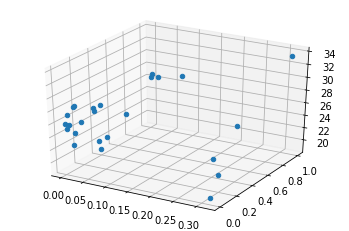

In [25]:
ax = plt.figure().gca(projection="3d")
ax.scatter3D(data[0],data[1],data[2],depthshade=False)
plt.show()

In [26]:
k = np.argmin(np.array(data[2]))
a = data[0][k]
l = data[1][k]
print(a,l)

0.31622776601683794 0.01


In [27]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
X = np.array(Dtrain[range(0,4)])
y = np.array(Dtrain[4])             
w,plot_data = regularised_logistic(X,y,a,l,tol=1)
# training confusion matrix
f = X@w
for i in range(len(f)):
  if f[i] >= 0:
    f[i] = 1
  else:
    f[i] = 0
confusion_matrix(y,f)

17.341845937345884
17.617601214719166
17.617980829219373
17.61798144108352
17.617981442178838
17.6179814421809
17.617981442180902


array([[63, 11],
       [30, 46]])

In [28]:
plot_data

[17.341845937345884,
 17.617601214719166,
 17.617980829219373,
 17.61798144108352,
 17.617981442178838,
 17.6179814421809,
 17.617981442180902,
 17.617981442180902]

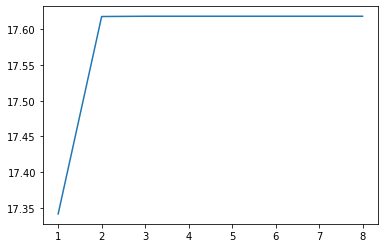

In [29]:
plt.plot(range(1,len(plot_data)+1),plot_data)
plt.show()

In [30]:
# testing

X = np.array(Dtest[range(0,4)])
y = np.array(Dtest[4]) 
f = X@w
for i in range(len(f)):
  if f[i] >= 0:
    f[i] = 1
  else:
    f[i] = 0
cm = confusion_matrix(y,f)
metrics = precision_recall_fscore_support(y,f)
print(cm)
print("Precision = ",metrics[0])
print("recall = ",metrics[1])
print("fscore = ",metrics[2])

[[18  7]
 [ 4 21]]
Precision =  [0.81818182 0.75      ]
recall =  [0.72 0.84]
fscore =  [0.76595745 0.79245283]


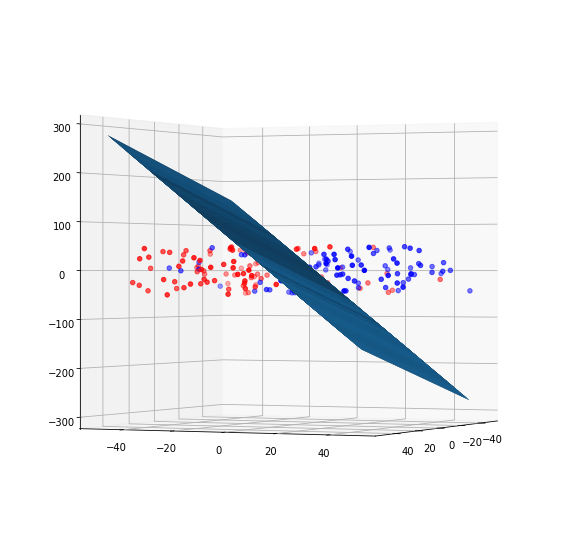

In [31]:
c = ["r" if i[4] == 1 else "b" for i in np.array(df2)]
x1 = np.linspace(-50,50,100)
x2 = np.linspace(-50,50,100)
np.random.shuffle(x2)
X1,X2 = np.meshgrid(x1,x2)
X3 = (w[0]+w[1]*X1+w[2]*X2)/(-w[3])
ax = plt.figure(figsize=(10,10)).gca(projection="3d")
ax.scatter3D(df2[1],df2[2],df2[3],c=c)
ax.plot_surface(X1,X2,X3)
ax.view_init(0,25)
plt.show()

#4. Analyze AutoMpg using ridge regression (download from UCI web repository)

(a) Discuss the experimental results.

(b) Compare the performance of the model with any other algorithm you know.

In [32]:
am = pd.read_csv("/content/drive/MyDrive/DM_A_5/auto-mpg.csv",header=None)
am.head()

,0,1,2,3,4,5,6,7
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [33]:
am.insert(0,"x0",1)

In [34]:
am = am.replace('?',np.NaN)

In [35]:
am.columns = range(0,9)
am.head()

,0,1,2,3,4,5,6,7,8
0,1,8,307.0,130,3504,12.0,70,1,18.0
1,1,8,350.0,165,3693,11.5,70,1,15.0
2,1,8,318.0,150,3436,11.0,70,1,18.0
3,1,8,304.0,150,3433,12.0,70,1,16.0
4,1,8,302.0,140,3449,10.5,70,1,17.0


In [36]:
from sklearn.model_selection import train_test_split 
Dtrain,Dtest = train_test_split(am,test_size=0.25,random_state=0)

In [37]:
from sklearn.impute import SimpleImputer 
impute = SimpleImputer(strategy="mean")
Dtrain = pd.DataFrame(impute.fit_transform(Dtrain),columns=Dtrain.columns)

In [38]:
l = np.logspace(-2,0,10)
training_error = []
validation_error = []
I = np.zeros((Dtrain.shape[1]-1,Dtrain.shape[1]-1))
I[1:,1:] = np.eye(Dtrain.shape[1]-2)
for k in l:
  te = np.zeros(30)
  ve = np.zeros(30)
  for j in range(30):
    train,valid = train_test_split(Dtrain,test_size=0.25)
    # Training
    X = np.array(train[range(0,8)])
    y = np.array(train[8])
    w = np.linalg.inv(X.T@X+k*I)@X.T@y 
    # Training error
    te[j] = ((X@w-y)**2).mean()
    # Validation error
    X = np.array(valid[range(0,8)])
    y = np.array(valid[8])
    ve[j]= ((X@w-y)**2).mean()
  training_error.append(te.mean())
  validation_error.append(ve.mean())

print(l)
print(training_error)
print(validation_error)

[0.01       0.01668101 0.02782559 0.04641589 0.07742637 0.12915497
 0.21544347 0.35938137 0.59948425 1.        ]
[10.728076842431312, 10.766047586297198, 10.637733829577881, 10.448456579090843, 10.758937347379291, 10.798724718095679, 10.88796841202315, 10.736197743731903, 10.987554090149931, 10.56781622752054]
[11.81236246949856, 11.6497616535514, 12.02570060595035, 12.641491558207811, 11.680195485346065, 11.515964849255136, 11.23983610961846, 11.695297729386605, 10.96661538476347, 12.25375731828885]


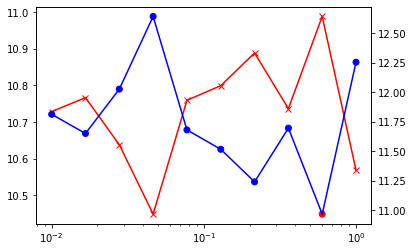

In [39]:
ax1= plt.figure().gca()
vmin = np.min(validation_error)
mask = validation_error == vmin
color = np.where(mask, 'red', 'blue')
ax1.plot(l,training_error,"rx-")
ax1.set_xscale("log")
ax2 = ax1.twinx()
ax2.plot(l,validation_error,"b-")
ax2.scatter(l,validation_error,color=color)
ax2.set_xscale("log")
plt.show()

In [40]:
Dtest = pd.DataFrame(impute.transform(Dtest),columns=Dtest.columns)

In [41]:
# Training
l = l[np.argmin(validation_error)]
X = np.array(Dtrain[range(0,8)])
y = np.array(Dtrain[8])
I = np.zeros((Dtrain.shape[1]-1,Dtrain.shape[1]-1))
I[1:,1:] = np.eye(Dtrain.shape[1]-2)
w = np.linalg.inv(X.T@X+l*I)@X.T@y
# Training RMSE
TRMSE = np.sqrt(((X@w-y)**2).mean())
# Testing RMSE
X = np.array(Dtest[range(0,8)])
y = np.array(Dtest[8])
TERMSE = np.sqrt(((X@w-y)**2).mean())
print(TRMSE,TERMSE)

3.2954929182488666 3.412754729122624


In [42]:
# Desicion tree regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor()
model.fit(Dtrain[range(1,8)],Dtrain[8])
ypred = model.predict(Dtrain[range(1,8)])
ytest = np.array(Dtrain[8])
TRMSE = np.sqrt(mean_squared_error(ytest,ypred))
ypred = model.predict(Dtest[range(1,8)])
ytest = np.array(Dtest[8])
TERMSE = np.sqrt(mean_squared_error(ytest,ypred))
print(TRMSE,TERMSE)

1.129419518896513 2.5877054005431157


#5. Consider Data 3. Let the data be generated by the model f (p) = ap1^2 + bp1p2 + cp2^2 + d where p = (p1 , p2 ).T

##(a) Report the parameters of the model.

##(b) Report the performance of the model.

In [43]:
df3 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data3.csv",header=None)
df3.head()

,0,1,2
0,2.769400,-1.34990,35.6070
1,3.034900,0.72540,13.8790
2,-0.063055,0.71474,-4.7861
3,-0.204970,-0.12414,-5.9449
4,1.489700,1.40900,-3.7678


In [44]:
df3.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,-0.007316,-0.072500,-0.851890
std,1.015849,1.011099,7.118638
min,-3.029200,-2.944300,-5.999200
25%,-0.703647,-0.773290,-5.101275
50%,-0.030432,-0.083517,-3.688900
75%,0.633873,0.651545,0.966470
max,3.034900,2.908000,39.381000


In [45]:
df3.corr()

,0,1,2
0,1.000000,-0.006063,0.001338
1,-0.006063,1.000000,0.002709
2,0.001338,0.002709,1.000000


In [46]:
df3_copy = pd.DataFrame(  data= { 0 :np.ones(df3.shape[0]), 1 : df3[0]**2, 2: df3[0]*df3[1], 3:df3[1]**2, 4:df3[2]})
df3_copy.head()

,0,1,2,3,4
0,1.0,7.669576,-3.738413,1.822230,35.6070
1,1.0,9.210618,2.201516,0.526205,13.8790
2,1.0,0.003976,-0.045068,0.510853,-4.7861
3,1.0,0.042013,0.025445,0.015411,-5.9449
4,1.0,2.219206,2.098987,1.985281,-3.7678


In [47]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df3_copy[range(0,4)],df3_copy[4],test_size=0.25)
Xtest.head()

,0,1,2,3
64,1.0,1.271256,0.394828,0.122626
130,1.0,0.425574,0.213361,0.106968
5,1.0,2.008456,0.951650,0.450912
112,1.0,0.549244,0.376350,0.257881
183,1.0,0.818392,0.260774,0.083094


In [48]:
# Training
w = np.linalg.pinv(Xtrain) @ Ytrain
print(w)


[-5.99999805  2.99999549 -4.00000089  1.99998545]


In [49]:
# Testing
RMSE = np.sqrt(((Xtest@w.reshape(-1,1) - np.array(Ytest).reshape(-1,1))**2).mean())
RMSE

0    0.000195
dtype: float64

# 6. Analyze Data 4 and Data 5 using decision tree

###(a) Describe the procedure you used for the analysis.

###(b) Access the performance of the model.

In [50]:
df4 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data4.csv",header=None)
df4.head()

,0,1,2,3
0,1,1,1,1
1,1,1,2,1
2,1,1,3,1
3,1,1,5,1
4,1,1,7,1


In [51]:
df4.nunique()

0    8
1    8
2    8
3    2
dtype: int64

In [52]:
df4[3].unique()

array([ 1, -1])

In [53]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df4[range(0,3)],df4[3],test_size=0.25)
Xtest.head()

,0,1,2
88,4,5,7
67,3,3,8
115,6,1,7
91,4,7,6
153,8,3,8


In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy",random_state=10)
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [55]:
model.get_depth()

6

In [56]:
model.get_n_leaves()

14

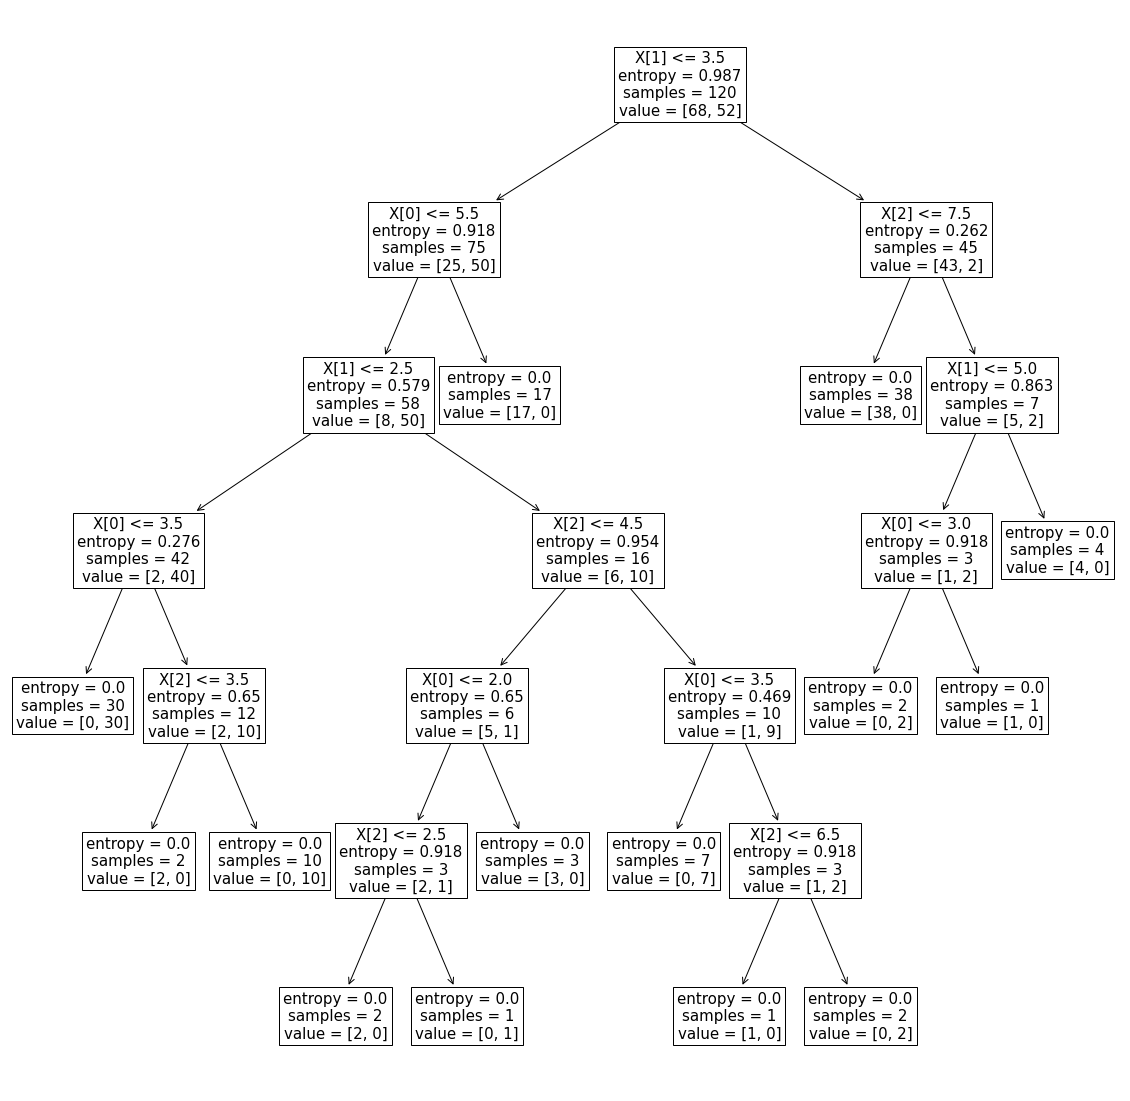

In [57]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,20))
plot_tree(model,fontsize=15)
plt.show()

In [58]:
# Mean Accuracy 
model.score(Xtest,Ytest)

0.975609756097561

In [59]:
from sklearn.metrics import confusion_matrix ,precision_recall_fscore_support
Ypred = model.predict(Xtest)
cm = confusion_matrix(Ytest,Ypred)
metric = precision_recall_fscore_support(Ytest,Ypred)
print(cm)
metrics = ["precision","recall","fscore","support"]
for i in range(len(metric)):
  print(f"{metrics[i]} for class '1' is {metric[i][0]}")
  print(f"{metrics[i]} for class '-1' is {metric[i][1]}")

[[25  0]
 [ 1 15]]
precision for class '1' is 0.9615384615384616
precision for class '-1' is 1.0
recall for class '1' is 1.0
recall for class '-1' is 0.9375
fscore for class '1' is 0.9803921568627451
fscore for class '-1' is 0.967741935483871
support for class '1' is 25
support for class '-1' is 16


**DATA 5**

In [60]:
df5 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data5.csv",header=None)
df5.head()

,0,1,2,3
0,-48.780,-5.5458,2.4477,-1
1,-48.612,-39.2840,12.7950,-1
2,-46.885,-16.0340,-8.8351,1
3,-46.384,-40.1080,-17.2380,1
4,-46.007,-19.0540,-17.6810,1


In [61]:
df5.nunique()

0    209
1    209
2    209
3      2
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df5[range(0,3)],df5[3],test_size=0.25)
Xtest.head()

,0,1,2
115,13.750,10.828,-15.669
178,38.790,15.701,-38.581
192,45.001,25.584,-43.972
201,48.172,-22.298,20.115
150,29.871,-23.617,17.621


In [63]:
# from sklearn.preprocessing import StandardScaler 

# stnd = StandardScaler()
# Xtrain = stnd.fit_transform(Xtrain)
# Xtest = stnd.transform(Xtest)

In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy",random_state=10,max_depth=6)
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)

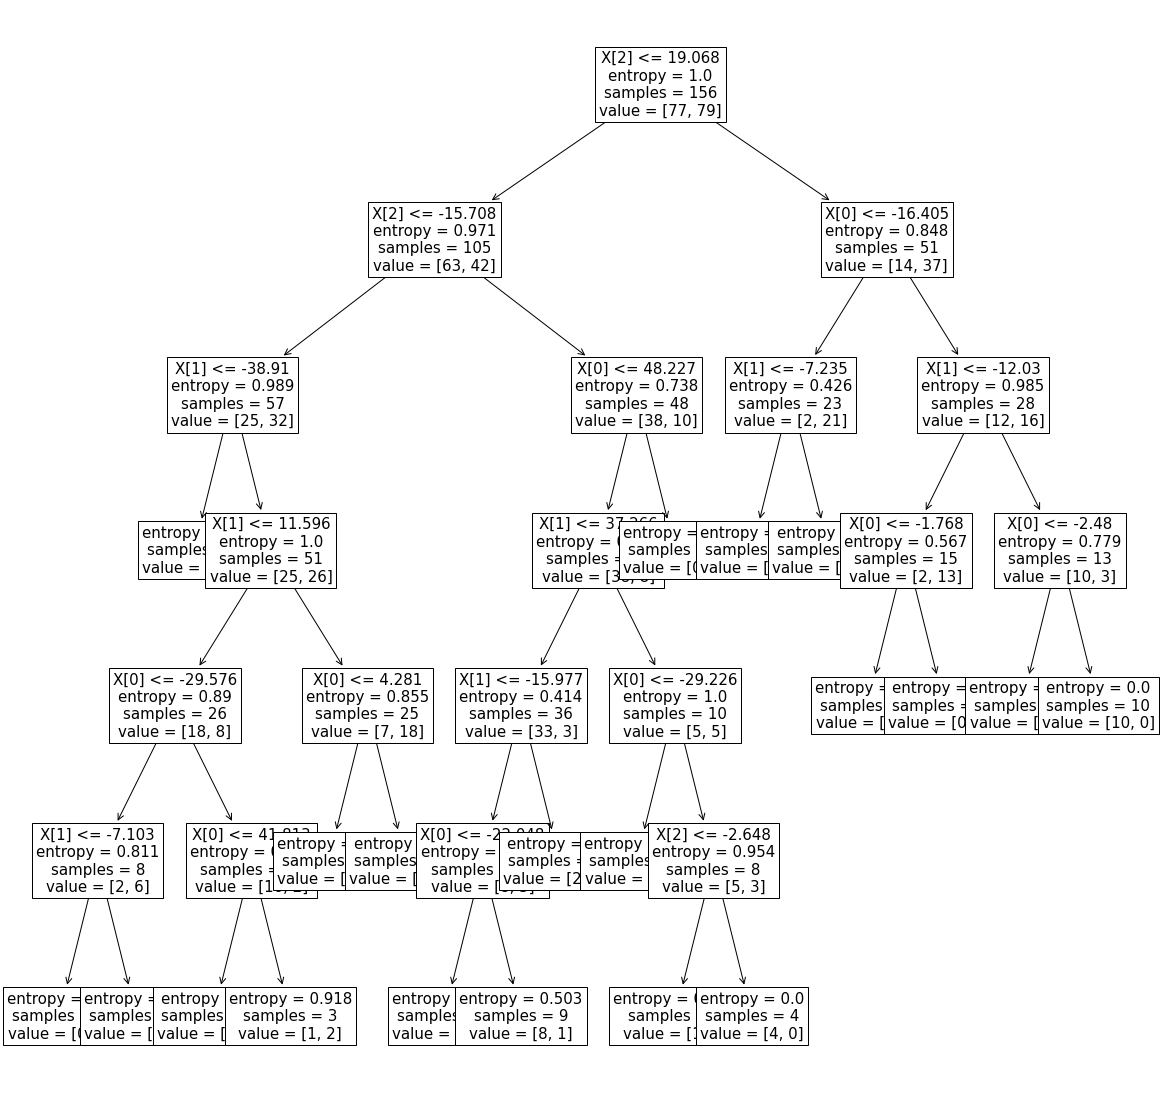

In [65]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,20))
plot_tree(model,fontsize=15)
plt.show()

In [66]:
# Mean Accuracy 
model.score(Xtest,Ytest)

0.8301886792452831

In [67]:
from sklearn.metrics import confusion_matrix ,precision_recall_fscore_support
Ypred = model.predict(Xtest)
cm = confusion_matrix(Ytest,Ypred)
metric = precision_recall_fscore_support(Ytest,Ypred)
print(cm)
metrics = ["precision","recall","fscore","support"]
for i in range(len(metric)):
  print(f"{metrics[i]} for class '1' is {metric[i][0]}")
  print(f"{metrics[i]} for class '-1' is {metric[i][1]}")

[[20  3]
 [ 6 24]]
precision for class '1' is 0.7692307692307693
precision for class '-1' is 0.8888888888888888
recall for class '1' is 0.8695652173913043
recall for class '-1' is 0.8
fscore for class '1' is 0.8163265306122449
fscore for class '-1' is 0.8421052631578948
support for class '1' is 23
support for class '-1' is 30


# 9. Develop 5th, 7th and 8th degree polynomial models for Data 6

(a) Report the pre-processing and validation techniques used.

(b) Report the parameters of the model.

(c) Plot the graph of the resulting models.

(d) Compare the performance of the models statistical measures (t test) and select the best among them.

In [68]:
df6 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data6.csv",header=None)
df6.head()

,0,1
0,1.46210,8.527200
1,-2.36450,12.077000
2,1.08940,2.808600
3,-0.22044,-0.088805
4,-1.72700,15.003000


In [69]:
df6.describe()

,0,1
count,100.000000,100.000000
mean,0.043832,21.573869
std,1.691723,47.081767
min,-2.876800,-29.745000
25%,-1.477825,1.140525
50%,0.212805,6.027600
75%,1.465350,17.016750
max,2.982000,271.910000


In [70]:
from sklearn.preprocessing import PolynomialFeatures 

poly5 = PolynomialFeatures(5)
poly7 = PolynomialFeatures(7)
poly8 = PolynomialFeatures(8)

In [71]:
data6 = np.array(df6)

In [72]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data6[:,0],data6[:,-1],test_size=0.25,random_state=10)

In [73]:
Xp5 = poly5.fit_transform(Xtrain.reshape(-1,1))
Xp7 = poly7.fit_transform(Xtrain.reshape(-1,1))
Xp8 = poly8.fit_transform(Xtrain.reshape(-1,1))

In [74]:
len(Ytrain)

75

In [75]:
# Conjugate gradient method
from sklearn.metrics import mean_squared_error
def conjugate_gradient(X,y,tol=2):
  Q = X.T@X
  b = X.T@y 
  n = len(Q)
  w = np.random.random((n,1))
  g = Q@w - b
  d = -g
  error = 10
  for i in range(200):
    a = (-g.T@d)/(d.T@Q@d)
    w += a*d
    g = Q@w-b
    if all(np.abs(g)<0.1):
      #print(g)
      break
    beta = (g.T@d)/(d.T@Q@d)
    d = -g + beta*d
    error = np.sqrt(mean_squared_error(y,X@w))
    if error <= tol:
      break
  #print(i)
  return w


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
MSE_5 = []
for i in range(10):
  Dtrain,Dtest = train_test_split(data6,test_size=0.3)
  X = poly5.transform(Dtrain[:,:-1].reshape(-1,1))
  y = Dtrain[:,-1]
  w = conjugate_gradient(X,y.reshape(-1,1),tol=5)
  X = poly5.transform(Dtest[:,:-1].reshape(-1,1))
  y = Dtest[:,-1]
  MSE_5.append(mean_absolute_error(y,X@w))

MSE_7 = []
for i in range(10):
  Dtrain,Dtest = train_test_split(data6,test_size=0.3)
  X = poly7.transform(Dtrain[:,:-1].reshape(-1,1))
  y = Dtrain[:,-1]
  w = conjugate_gradient(X,y.reshape(-1,1),tol=5)
  X = poly7.transform(Dtest[:,:-1].reshape(-1,1))
  y = Dtest[:,-1]
  MSE_7.append(mean_absolute_error(y,X@w))

MSE_8 = []
for i in range(10):
  Dtrain,Dtest = train_test_split(data6,test_size=0.3)
  X = poly8.transform(Dtrain[:,:-1].reshape(-1,1))
  y = Dtrain[:,-1]
  w = conjugate_gradient(X,y.reshape(-1,1),tol=5)
  X = poly8.transform(Dtest[:,:-1].reshape(-1,1))
  y = Dtest[:,-1]
  MSE_8.append(mean_absolute_error(y,X@w))

In [77]:
MSE_5 = np.array(MSE_5)
MSE_7 = np.array(MSE_7)
MSE_8 = np.array(MSE_8)

AMSE_5 = MSE_5.mean()
AMSE_7 = MSE_7.mean()
AMSE_8 = MSE_8.mean()

VMSE_5 = MSE_5.var()
VMSE_7 = MSE_7.var()
VMSE_8 = MSE_8.var()

#5th vs 7th
var57 = np.sqrt(VMSE_5/10 + VMSE_7/10)
t57 = (AMSE_5-AMSE_7)/np.sqrt(var57/10)

#5th vs 8th
var58 = np.sqrt(VMSE_5/10 + VMSE_8/10)
t58 = (AMSE_5-AMSE_8)/np.sqrt(var58/10)

#7th vs 8th
var78 = np.sqrt(VMSE_7/10 + VMSE_8/10)
t78 = (AMSE_7-AMSE_8)/np.sqrt(var78/10)

print(t57,t58,t78)

-9.096425984918941 -13.713883602945632 -6.739708756542791


All models are statistically different since t < -0.025

In [78]:
w5 = conjugate_gradient(Xp5,Ytrain.reshape(-1,1))

In [79]:
from sklearn.metrics import mean_squared_error 
print("Training RMSE:",np.sqrt(mean_squared_error(Ytrain,Xp5@w5)))
Xt5 = poly5.transform(Xtest.reshape(-1,1))
print("Testing RMSE:",np.sqrt(mean_squared_error(Ytest,Xt5@w5)))

Training RMSE: 4.388885416489531
Testing RMSE: 5.845872834230753


In [80]:
w7 = conjugate_gradient(Xp7,Ytrain.reshape(-1,1))

In [81]:
print("Training RMSE:",np.sqrt(mean_squared_error(Ytrain,Xp7@w7)))
Xt7 = poly7.transform(Xtest.reshape(-1,1))
print("Testing RMSE:",np.sqrt(mean_squared_error(Ytest,Xt7@w7)))

Training RMSE: 7.508353125100481
Testing RMSE: 8.19314180615622


In [82]:
w8 = conjugate_gradient(Xp8,Ytrain.reshape(-1,1))

In [83]:
print("Training RMSE:",np.sqrt(mean_squared_error(Ytrain,Xp8@w8)))
Xt8 = poly8.transform(Xtest.reshape(-1,1))
print("Testing RMSE:",np.sqrt(mean_squared_error(Ytest,Xt8@w8)))

Training RMSE: 7.322455585284739
Testing RMSE: 9.596535332176353


In [84]:
# Paramters
print("5th degree polynomial regression : \n",w5.T)
print("7th degree polynomial regression : \n",w7.T)
print("8th degree polynomial regression : \n",w8.T)

5th degree polynomial regression : 
 [[ 0.90792261  0.07430722  1.00743064 -0.52811397  1.28759603  0.65690095]]
7th degree polynomial regression : 
 [[0.23472857 0.40899062 0.9517579  0.77080423 0.43054817 0.26328672
  0.12544244 0.0336157 ]]
8th degree polynomial regression : 
 [[ 0.79856801  0.48212319  0.93050488  0.79058708  0.66610786  0.13113148
  -0.00751019  0.05111885  0.01358776]]


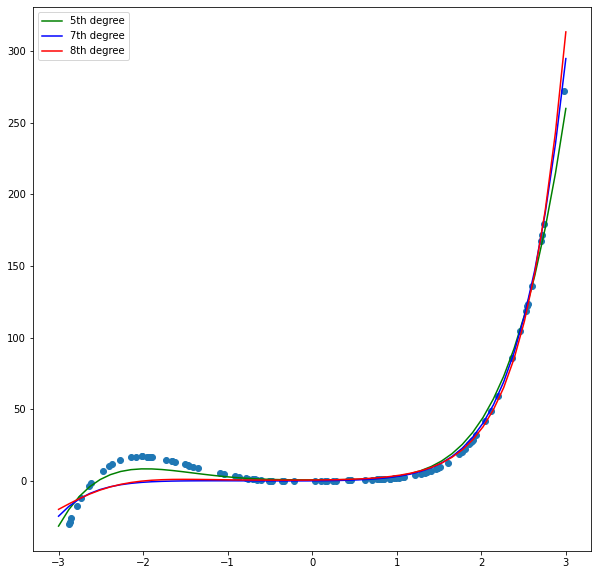

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(data6[:,0],data6[:,-1])
x1 = np.linspace(-3,3,50)
X5 = poly5.transform(x1.reshape(-1,1))
X7 = poly7.transform(x1.reshape(-1,1))
X8 = poly8.transform(x1.reshape(-1,1))
plt.plot(x1,(X5@w5).reshape(1,-1)[0],"-g",x1,(X7@w7).reshape(1,-1)[0],"-b",x1,(X8@w8).reshape(1,-1)[0],"-r")
plt.legend(["5th degree","7th degree","8th degree"])
plt.show()

# 10. Analyze Data7 using KNN

(a) Apply Euclidean Distance, Mahalonabis distance and Manhattan distance and
compare the performance.

(b) Discuss the method used to find the hyperparameters. Report their values.

(c) Discuss the performance of the model.

(d) Plot ROC Curve

In [86]:
df7 = pd.read_csv("/content/drive/MyDrive/DM_A_5/data7.csv",header=None)
df7.head()

,0,1,2,3
0,-5.21460,7.0880,6.72920,1
1,-0.42176,8.4266,7.89610,1
2,-6.13460,5.6864,6.08860,1
3,6.21260,8.3078,2.36230,1
4,6.34460,7.6650,0.53239,1


In [87]:
df7.describe()

,0,1,2,3
count,400.000000,400.000000,400.000000,400.000000
mean,4.094752,7.483779,2.215582,0.500000
std,6.213304,1.040157,6.853504,0.500626
min,-14.142000,3.924800,-11.039000,0.000000
25%,-0.352842,6.860800,-3.089925,0.000000
50%,4.869100,7.471300,4.177500,0.500000
75%,9.431950,8.227175,7.512150,1.000000
max,12.606000,10.399000,14.145000,1.000000


In [88]:
from scipy.spatial.distance import cdist
np.random.seed(0)
def kmeans(k,X,distance="mahalanobis"):
  centers = 10*np.random.random((k,len(X[0])))
  oldindex = {j:[] for j in range(0,k)}
  while True:
    index = {j:[] for j in range(0,k)}
    dist = cdist(X,centers,distance)
    for i in range(len(dist)):
      cl = np.argmin(dist[i])
      index[cl].append(i)
    for i in range(len(centers)):
      centers[i] = np.sum(np.take(X,index[i],axis=0),axis=0) / np.max([len(index[i]),1])
    if index == oldindex:
      break 
    oldindex = index.copy()
  return centers

In [89]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df7[range(0,3)],df7[3],test_size=0.25,random_state=0)

In [90]:
k_values = range(1,10)
SE = np.zeros(len(k_values))
for k in k_values:
  centers = kmeans(k,np.array(Xtrain))
  dist = cdist(Xtrain,centers,metric="mahalanobis")
  for i in dist:
    SE[k-k_values[0]] += np.min(i)**2
SE

array([900.        , 702.554057  , 628.9698609 , 408.32629313,
       428.89181262, 552.61968261, 384.80861068, 300.4892214 ,
       252.84754906])

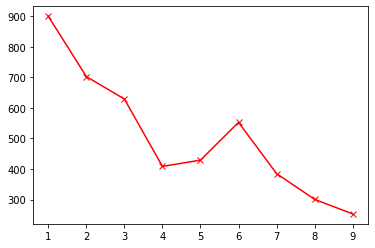

In [91]:
plt.plot(k_values,SE,"rx-")
plt.show()

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = range(2,10)
SE = []
sil = []
for k in k_values:
  kmean = KMeans(n_clusters=k,random_state=0)
  kmean.fit(np.array(Xtrain))
  centers = kmean.cluster_centers_
  SE.append(kmean.inertia_)
  sil.append(silhouette_score(Xtrain, kmean.labels_, metric = 'mahalanobis'))
print(SE)
print(sil)

[13326.241880604903, 8467.652317224381, 6112.044335999735, 4789.684509516995, 3969.356598608164, 3341.1161074042884, 2725.6828895508534, 2338.5378372251466]
[0.26345380977666494, 0.25834787058290715, 0.2218372171897917, 0.20591999231816935, 0.2194950984970537, 0.18913391928630602, 0.187825566811785, 0.17451188340700563]


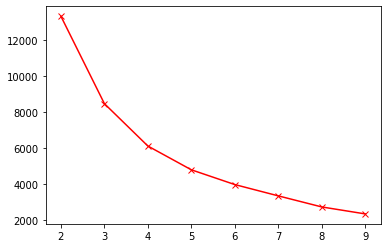

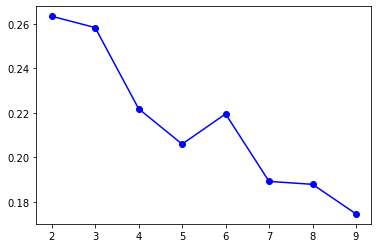

In [93]:
plt.plot(k_values,SE,"rx-")
plt.show()
plt.plot(k_values,sil,"bo-")
plt.show()

In [94]:
# With Euclidean distance

centers_euc = kmeans(2,np.array(Xtrain),"euclidean")

# With Mahalanobis distance

centers_mlb = kmeans(2,np.array(Xtrain),"mahalanobis")

# With Manhattan distance

centers_mhtn = kmeans(2,np.array(Xtrain),"cityblock")

In [95]:
print(centers_euc)
print(centers_mlb)
print(centers_mhtn)

[[ 7.93345555  7.49656258 -2.79981725]
 [ 0.47246378  7.52620483  7.6937109 ]]
[[ 0.54675747  7.55143673  7.63483456]
 [ 7.95960464  7.47193268 -2.88042009]]
[[ 9.03066513  7.48196645 -1.51319259]
 [-0.5031638   7.54059459  6.15960595]]


In [96]:
from sklearn.metrics import confusion_matrix 
ypred = [np.argmin(i) for i in cdist(Xtest,centers_euc)]
cm_euc = confusion_matrix(Ytest,ypred)
print(cm_euc)
ypred = [np.argmin(i) for i in cdist(Xtest,centers_mlb)]
cm_mlb = confusion_matrix(Ytest,ypred)
print(cm_mlb)
ypred = [np.argmin(i) for i in cdist(Xtest,centers_mhtn)]
cm_mhtn = confusion_matrix(Ytest,ypred)
print(cm_mhtn)

[[32 13]
 [ 7 48]]
[[13 32]
 [48  7]]
[[35 10]
 [ 9 46]]


In [97]:
# ROC
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(Ytest,ypred)

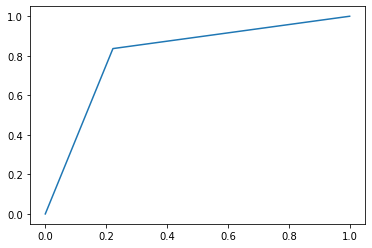

In [98]:
plt.plot(fpr,tpr)
plt.show()

# 10. Analyze Data7 using KNN

(a) Apply Euclidean Distance, Mahalonabis distance and Manhattan distance and
compare the performance.

(b) Discuss the method used to find the hyperparameters. Report their values.

(c) Discuss the performance of the model.

(d) Plot ROC Curve.

In [99]:
knndata = pd.read_csv("/content/drive/MyDrive/DM_A_5/data7.csv",header=None)
knndata.head()

,0,1,2,3
0,-5.21460,7.0880,6.72920,1
1,-0.42176,8.4266,7.89610,1
2,-6.13460,5.6864,6.08860,1
3,6.21260,8.3078,2.36230,1
4,6.34460,7.6650,0.53239,1


In [128]:
Dtrain,Dtest = train_test_split(knndata,test_size=0.25,random_state=0)
Dtest.head()

,0,1,2,3
132,-1.72130,8.3852,7.8832,1
309,-0.72427,6.0811,-10.9050,0
341,4.56420,7.5453,13.0230,0
196,4.37150,6.6131,5.7231,1
246,8.15610,7.7441,-8.4746,0


In [163]:
k_values = range(3,11)
Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(np.array(Dtrain[range(0,3)]),np.array(Dtrain[3]),test_size=0.2,random_state=0)
Euclidean_distance = cdist(Xvalid,Xtrain)
cm = {}
for i in k_values:
  indx = np.argpartition(Euclidean_distance,i)[:,:i]
  y = sp.stats.mode(Ytrain[indx],axis=1)[0]
  cm[i]=confusion_matrix(Yvalid,y)
for i in cm.keys():
  print(f"k = {i} : confusion matrix \n{cm[i]}")

k = 3 : confusion matrix 
[[33  1]
 [ 0 26]]
k = 4 : confusion matrix 
[[33  1]
 [ 1 25]]
k = 5 : confusion matrix 
[[33  1]
 [ 1 25]]
k = 6 : confusion matrix 
[[33  1]
 [ 1 25]]
k = 7 : confusion matrix 
[[33  1]
 [ 0 26]]
k = 8 : confusion matrix 
[[33  1]
 [ 1 25]]
k = 9 : confusion matrix 
[[33  1]
 [ 1 25]]
k = 10 : confusion matrix 
[[33  1]
 [ 1 25]]


In [167]:
Xtrain = np.array(Dtrain[range(0,3)])
Ytrain = np.array(Dtrain[3])
Xtest = np.array(Dtest[range(0,3)])
Ytest = np.array(Dtest[3])
k=5 

# Euclidean_distance
Euclidean_distance = cdist(Xtest,Xtrain)
indx = np.argpartition(Euclidean_distance,i)[:,:i]
y = sp.stats.mode(Ytrain[indx],axis=1)[0]
cm_eu=confusion_matrix(Ytest,y)
print("Confusion_matrix with Euclidean distance\n",cm_eu)

# Mahalanobis_distance
Mahalanobis_distance = cdist(Xtest,Xtrain,"mahalanobis")
indx = np.argpartition(Mahalanobis_distance,i)[:,:i]
y = sp.stats.mode(Ytrain[indx],axis=1)[0]
cm_eu=confusion_matrix(Ytest,y)
print("Confusion_matrix with Mahalanobis distance\n",cm_eu)

# Manhattan_distance
Manhattan_distance = cdist(Xtest,Xtrain,"cityblock")
indx = np.argpartition(Manhattan_distance,i)[:,:i]
y = sp.stats.mode(Ytrain[indx],axis=1)[0]
cm_eu=confusion_matrix(Ytest,y)
print("Confusion_matrix with Manhattan distance\n",cm_eu)

Confusion_matrix with Euclidean distance
 [[45  0]
 [ 1 54]]
Confusion_matrix with Mahalanobis distance
 [[45  0]
 [ 2 53]]
Confusion_matrix with Manhattan distance
 [[45  0]
 [ 0 55]]


#11. Apply regularized logistic regression, Decision tree and KNN on Breast Cancer Wisconsin (Diagnostic) Data Set (download the data from UCI web repository). Apply k fold and hold out cross validation techniques.

(a) Report the preprocessing techniques.

(b) Report the value of the performance measures used.

(c) Compare the performance of the algorithms using t test.

In [100]:
bc = pd.read_csv("/content/drive/MyDrive/DM_A_5/breast-cancer-wisconsin.csv",header=None)
bc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [101]:
bc = bc.drop(columns=0)
bc.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [102]:
bc=bc.replace("?",np.NaN)

In [103]:
bc[10].value_counts()

2    458
4    241
Name: 10, dtype: int64

In [104]:
bc[10] = (bc[10]/2)-1

In [105]:
bc.describe()

,1,2,3,4,5,7,8,9,10
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [106]:
from sklearn.model_selection import train_test_split 
Dtrain,Dtest = train_test_split(bc,test_size=0.25,random_state=0)
Dtrain.head()

,1,2,3,4,5,6,7,8,9,10
570,8,10,4,4,8,10,8,2,1,1.0
34,3,1,2,1,2,1,2,1,1,0.0
506,8,10,10,10,7,5,4,8,7,1.0
514,6,6,7,10,3,10,8,10,2,1.0
567,4,1,1,1,2,3,2,1,1,0.0


In [107]:
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(strategy="most_frequent")
Dtrain = pd.DataFrame(imp.fit_transform(Dtrain),columns=Dtrain.columns)

In [108]:
Dtrain[10].value_counts()

0.0    346
1.0    178
Name: 10, dtype: int64

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy",random_state=10,max_depth=4)
Xtrain = np.array(Dtrain[range(1,10)])
Ytrain = np.array(Dtrain[10],dtype="int")
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [110]:
# Mean Accuracy
Dtest = pd.DataFrame(imp.transform(Dtest),columns=Dtest.columns)
Xtest = np.array(Dtest[range(1,10)])
Ytest = np.array(Dtest[10],dtype="int")
model.score(Xtest,Ytest)

0.9428571428571428

In [111]:
from sklearn.metrics import confusion_matrix ,precision_recall_fscore_support
Ypred = model.predict(Xtest)
cm = confusion_matrix(Ytest,Ypred)
metric = precision_recall_fscore_support(Ytest,Ypred)
print(cm)
metrics = ["precision","recall","fscore","support"]
for i in range(len(metric)):
  print(f"{metrics[i]} for class '0' is {metric[i][0]}")
  print(f"{metrics[i]} for class '1' is {metric[i][1]}")

[[103   9]
 [  1  62]]
precision for class '0' is 0.9903846153846154
precision for class '1' is 0.8732394366197183
recall for class '0' is 0.9196428571428571
recall for class '1' is 0.9841269841269841
fscore for class '0' is 0.9537037037037036
fscore for class '1' is 0.9253731343283582
support for class '0' is 112
support for class '1' is 63


**Regularised Logistic Regression**

In [112]:
def sigmoid(X,w):
  return 1/(1+np.exp(-np.inner(w,X)))

In [113]:
DtrainRL = Dtrain.copy()
DtrainRL.insert(0,"x0",1)
DtrainRL.columns = range(0,11)
DtestRL = Dtest.copy()
DtestRL.insert(0,"x0",1)
DtestRL.columns = range(0,11)

In [114]:
# Cross Validation : Hold Out
import math
alphas = np.logspace(-3,0,10)
lambdas = np.logspace(-2,0,10)
data = [[],[],[]]
for a in alphas:
  for l in lambdas:
    Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(DtrainRL[range(0,10)],DtrainRL[10],test_size=0.25)
    Xtrain = np.array(Xtrain,dtype="int")
    Xvalid = np.array(Xvalid,dtype="int")
    Ytrain = np.array(Ytrain,dtype="int")
    Yvalid = np.array(Yvalid,dtype="int")
    w = np.random.random(len(Xtrain[0]))
    I = np.zeros((len(w),len(w)))
    I[1:,1:] = np.eye(len(w)-1)
    for j in range(1):
      for i in range(len(Xtrain)):
        f = sigmoid(Xtrain[i],w)
        w = w + a*(Ytrain[i]-f)*Xtrain[i] - l*(w@I)
    J = 0
    for j in range(len(Xvalid)):
      f = sigmoid(Xvalid[j],w)
      if math.isnan(f):
        continue
      h1 = np.log(f)
      h2 = np.log(1-f)
      reg_term = 0.5*l*np.linalg.norm(w@I)
      add_term = (-Yvalid[j]*h1-(1-Yvalid[j])*h2 + reg_term)
      J += add_term
    data[0].append(a)
    data[1].append(l)
    data[2].append(J)
print(data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


[[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 

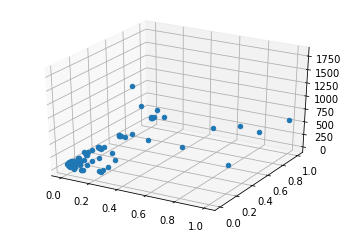

In [115]:
ax = plt.figure().gca(projection="3d")
ax.scatter3D(data[0],data[1],data[2],depthshade=False)
plt.show()

In [116]:
Jdata = np.array(data[2])
Jdata[np.isnan(Jdata)] = np.inf
k = np.argmin(Jdata)
a = data[0][k]
l = data[1][k]
print(a,l,k,Jdata[k])

0.1 0.027825594022071243 62 20.731274057215792


In [117]:
# Cross Validation : K fold
from sklearn.model_selection import KFold
import math
alphas = np.logspace(-3,0,10)
lambdas = np.logspace(-2,0,10)
data = [[],[],[]]
for a in alphas:
  for l in lambdas:
    kf = KFold(n_splits=10)
    CF = []
    for train_index, test_index in kf.split(DtrainRL):
      DT = DtrainRL.loc[train_index]
      DV = DtrainRL.loc[test_index]
      Xtrain = np.array(DT[range(0,10)],dtype="int")
      Xvalid = np.array(DV[range(0,10)],dtype="int")
      Ytrain = np.array(DT[10],dtype="int")
      Yvalid  = np.array(DV[10],dtype="int") 
      w = np.random.random(len(Xtrain[0]))
      I = np.zeros((len(w),len(w)))
      I[1:,1:] = np.eye(len(w)-1)
      for j in range(1):
        for i in range(len(Xtrain)):
          f = sigmoid(Xtrain[i],w)
          w = w + a*(Ytrain[i]-f)*Xtrain[i] - l*(w@I)
      J = 0
      for j in range(len(Xvalid)):
        f = sigmoid(Xvalid[j],w)
        if math.isnan(f):
          continue
        h1 = np.log(f)
        h2 = np.log(1-f)
        reg_term = 0.5*l*np.linalg.norm(w@I)
        add_term = (-Yvalid[j]*h1-(1-Yvalid[j])*h2 + reg_term)
        J += add_term
      CF.append(J)
    data[0].append(a)
    data[1].append(l)
    data[2].append(np.array(CF).mean())
print(data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply


[[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.0021544346900318843, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.004641588833612777, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.021544346900318832, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 0.046415888336127774, 

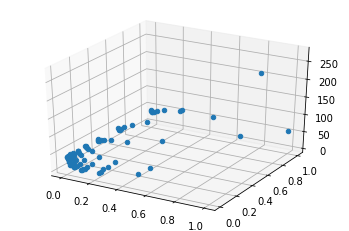

In [118]:
ax = plt.figure().gca(projection="3d")
ax.scatter3D(data[0],data[1],data[2],depthshade=False)
plt.show()

In [119]:
Jdata = np.array(data[2])
Jdata[np.isnan(Jdata)] = np.inf
k = np.argmin(Jdata)
a = data[0][k]
l = data[1][k]
print(a,l,k,Jdata[k])

0.1 0.046415888336127774 63 7.570445335534463


In [120]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support

X = np.array(DtrainRL[range(0,10)],dtype="int")
y = np.array(DtrainRL[10],dtype="int")             
w,plot_data = regularised_logistic(X,y,a,l,1.5*Jdata[k])
# training confusion matrix
f = X@w
for i in range(len(f)):
  if f[i] >= 0:
    f[i] = 1
  else:
    f[i] = 0
confusion_matrix(y,f)

18.90302719553095
20.338397061611186
28.73803395231466
30.19732644747031
30.26204887582192
30.058479744212445
29.856011662957954
29.713070264078624
29.622251885234967
29.566769963732852
29.533393613629897
29.513444466504193
29.50155559841499
29.494480440213604
29.490273089145322
29.4877721382818
29.486285852355604
29.48540268593056
29.484877939454808
29.484566167518434
29.484380936798757
29.484270888785463
29.48420550841588
29.484166665650296
29.48414358906772
29.484129879239703
29.484121734222217
29.48411689526559
29.48411402044141
29.484112312508937
29.484111297826644
29.484110695004375
29.48411033686783
29.484110124098866
29.484109997692727
29.48410992259531
29.48410987797949
29.48410985147367
29.484109835726418
29.484109826371025
29.484109820812783
29.484109817510756
29.484109815549207
29.484109814383743
29.484109813691195
29.4841098132797
29.48410981303545
29.48410981289042
29.484109812804117
29.484109812752884
29.484109812722327
29.484109812704254
29.484109812693642
29.4841098126

array([[311,  35],
       [  0, 178]])

In [121]:
# testing

X = np.array(DtestRL[range(0,10)],dtype="int")
y = np.array(DtestRL[10],dtype="int") 
f = X@w
for i in range(len(f)):
  if f[i] >= 0:
    f[i] = 1
  else:
    f[i] = 0
cm = confusion_matrix(y,f)
metrics = precision_recall_fscore_support(y,f)
print(cm)
print("Precision = ",metrics[0])
print("recall = ",metrics[1])
print("fscore = ",metrics[2])

[[100  12]
 [  0  63]]
Precision =  [1.   0.84]
recall =  [0.89285714 1.        ]
fscore =  [0.94339623 0.91304348]


**KNN**

In [122]:
k_values = range(1,10)
SE = np.zeros(len(k_values))
for k in k_values:
  centers = kmeans(k,np.array(Dtrain[range(1,10)],dtype="int"),"euclidean")
  dist = cdist(Dtrain[range(1,10)],centers,metric="euclidean")
  for i in dist:
    SE[k-k_values[0]] += np.min(i)**2
SE

array([37344.53435115, 14988.74150881, 12695.31466492, 11305.43714276,
       10706.82547891, 10067.97083658,  9257.72083197,  9309.5596008 ,
        8778.92054312])

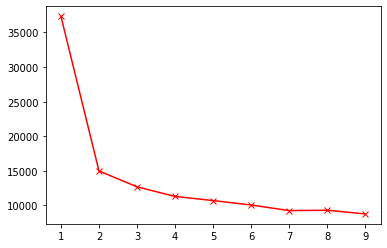

In [123]:
plt.plot(k_values,SE,"rx-")
plt.show()

In [124]:
centers = kmeans(2,np.array(Dtrain[range(1,10)],dtype="int"),"euclidean")

In [125]:
centers

array([[7.06395349, 6.91860465, 6.79069767, 5.94767442, 5.52325581,
        7.72093023, 6.12790698, 6.25      , 2.5       ],
       [3.0625    , 1.27840909, 1.43465909, 1.33238636, 2.10795455,
        1.29261364, 2.10511364, 1.29829545, 1.09090909]])

In [126]:
ypred = [np.argmin(i) for i in cdist(Dtest[range(1,10)],centers)]
cm = confusion_matrix(np.array(Dtest[10],dtype="int"),ypred)
print(cm)

[[  3 109]
 [ 58   5]]
